# Pablo Elias Ramirez Escalante

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv("pokemon.csv")
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [148]:
columnas = list(df.columns)
columnas

['abilities',
 'against_bug',
 'against_dark',
 'against_dragon',
 'against_electric',
 'against_fairy',
 'against_fight',
 'against_fire',
 'against_flying',
 'against_ghost',
 'against_grass',
 'against_ground',
 'against_ice',
 'against_normal',
 'against_poison',
 'against_psychic',
 'against_rock',
 'against_steel',
 'against_water',
 'attack',
 'base_egg_steps',
 'base_happiness',
 'base_total',
 'capture_rate',
 'classfication',
 'defense',
 'experience_growth',
 'height_m',
 'hp',
 'japanese_name',
 'name',
 'percentage_male',
 'pokedex_number',
 'sp_attack',
 'sp_defense',
 'speed',
 'type1',
 'type2',
 'weight_kg',
 'generation',
 'is_legendary']

## Realizar una visualizacion por ejercicio que respodan cada cuestionamiento:
1. ¿Cuantos nuevos pokemon hay por generación?
2. ¿Cuantos pokemon legendarios hay por generacion?
3. Visualizacion por peso y altura
4. ¿Cual es el tipo más común de pokemon?
5. ¿Cuales son las combinaciones de tipo más comunes?
6. ¿Qué pokemon son los mejores en terminos de sus stats?
    (attack, defense, sp_attack, sp_defense, speed, hp)
7. ¿Cómo cambiaron los stats en promedio conforme avanzan las generaciones?
8. ¿Un pokemon es más fuerte entre más dificil es de capturar?

### 1. ¿Cuantos nuevos pokemon hay por generación?

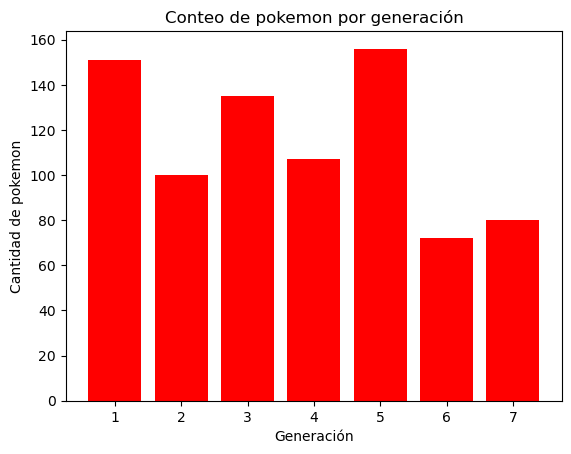

In [149]:
df_gen = df[["name","generation"]].groupby("generation").count()

plt.bar(df_gen.index, df_gen["name"],color="r")
plt.title("Conteo de pokemon por generación")
plt.xlabel("Generación")
plt.ylabel("Cantidad de pokemon")
plt.show()

In [150]:
df_gen

,name
generation,
1,151
2,100
3,135
4,107
5,156
6,72
7,80


### 2. ¿Cuantos pokemon legendarios hay por generacion?

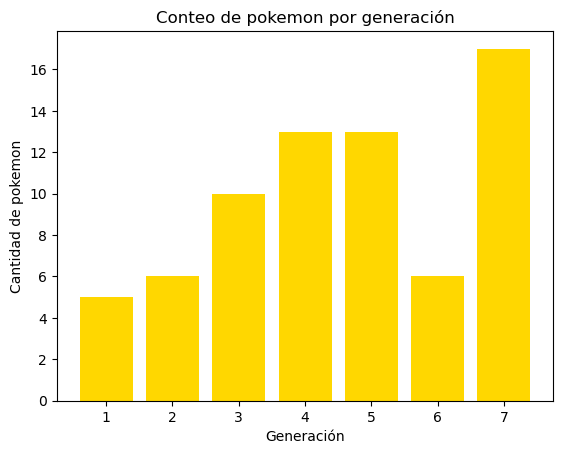

In [151]:
df_Legend = df[df["is_legendary"]==1][["name","is_legendary","generation"]].groupby("generation").count()

plt.bar(df_Legend.index, df_Legend["name"],color ="#FFD700")
plt.title("Conteo de pokemon por generación")
plt.xlabel("Generación")
plt.ylabel("Cantidad de pokemon")
plt.show()

In [152]:
df_Legend[["is_legendary"]]

,is_legendary
generation,
1,5
2,6
3,10
4,13
5,13
6,6
7,17


### 3. Visualizacion por peso y altura


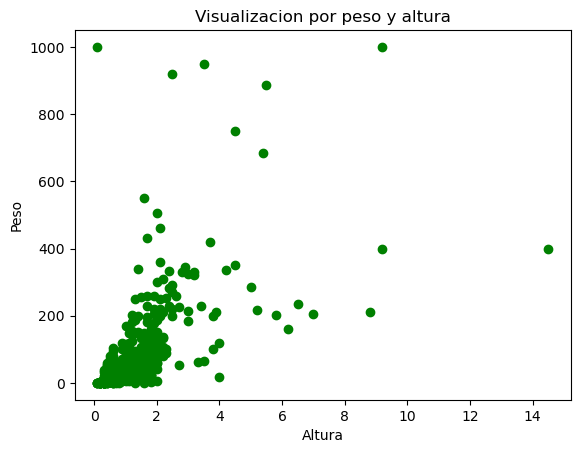

In [153]:
df_HW = df[["name","height_m","weight_kg"]]
plt.scatter(df_HW["height_m"],df_HW["weight_kg"],color="g")
plt.title("Visualizacion por peso y altura")
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.show()

In [154]:
df_HW

,name,height_m,weight_kg
0,Bulbasaur,0.7,6.9
1,Ivysaur,1.0,13.0
2,Venusaur,2.0,100.0
3,Charmander,0.6,8.5
4,Charmeleon,1.1,19.0
...,...,...,...
796,Celesteela,9.2,999.9
797,Kartana,0.3,0.1
798,Guzzlord,5.5,888.0
799,Necrozma,2.4,230.0


### 4. ¿Cual es el tipo más común de pokemon?


El tipo más comun es: water
Frecuencia: 114 veces


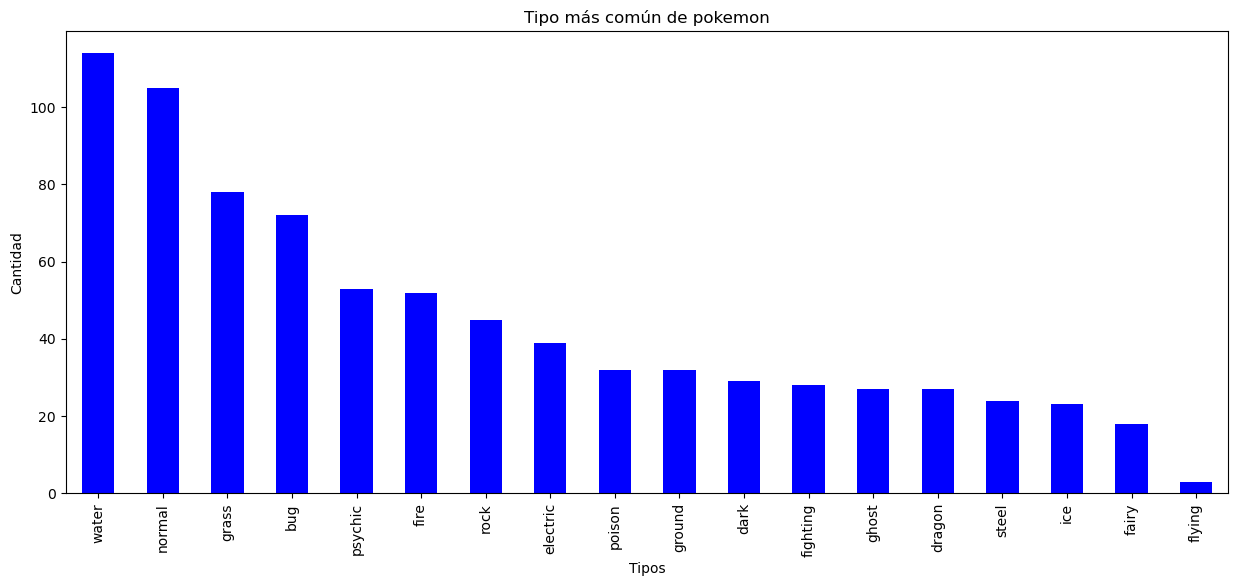

In [170]:
df_popular_type = df["type1"].value_counts()

tipo_mas_comun = df_popular_type.idxmax()
print("El tipo más comun es:", tipo_mas_comun)
print("Frecuencia:", df_popular_type[tipo_mas_comun],"veces")

plt.figure(figsize=(15,6))
df_popular_type.plot(kind="bar", color="b")
plt.title("Tipo más común de pokemon")
plt.xlabel("Tipos")
plt.ylabel("Cantidad")
plt.show()

In [156]:
df_popular_type

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

### 5. ¿Cuales son las combinaciones de tipo más comunes?


In [157]:
df_popular_mixType = df[~df["type2"].isna()]
df_popular_mixType["type"] = df_popular_mixType["type1"] + "-" + df_popular_mixType["type2"]

/var/folders/p5/j3wh834s27qfscd4fgg1slg00000gn/T/ipykernel_1097/436635121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_popular_mixType["type"] = df_popular_mixType["type1"] + "-" + df_popular_mixType["type2"]


La combinación de tipo más comun es: normal-flying
Frecuencia: 26


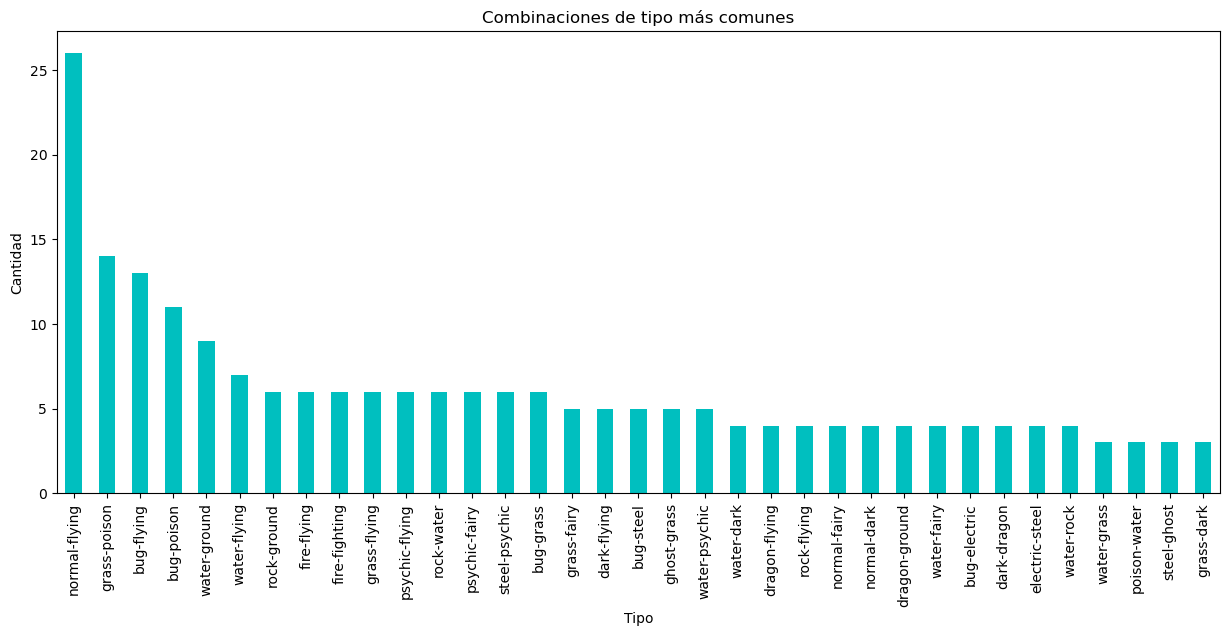

In [174]:
frecuencias = df_popular_mixType["type"].value_counts()

cadena_mas_repetida = frecuencias.idxmax()
print("La combinación de tipo más comun es:", cadena_mas_repetida)
print("Frecuencia:", frecuencias[cadena_mas_repetida])

plt.figure(figsize=(15,6))
frecuencias.head(35).plot(kind="bar", color="c")
plt.title("Combinaciones de tipo más comunes")
plt.xlabel("Tipo")
plt.ylabel("Cantidad")
plt.show()

In [175]:
frecuencias

normal-flying    26
grass-poison     14
bug-flying       13
bug-poison       11
water-ground      9
                 ..
dragon-fire       1
ghost-dark        1
dragon-ice        1
fire-psychic      1
rock-poison       1
Name: type, Length: 148, dtype: int64

In [176]:
frecuencias.idxmax()

'normal-flying'

### 6. ¿Qué pokemon son los mejores en terminos de sus stats? (attack, defense, sp_attack, sp_defense, speed, hp)

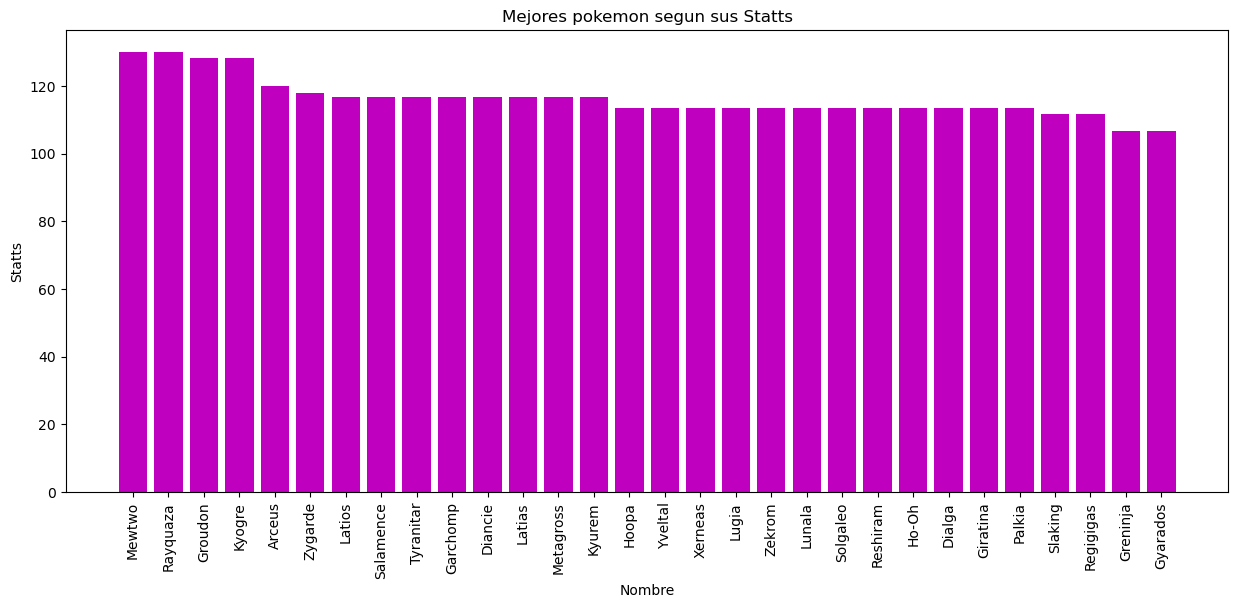

In [179]:
df["Statts"] = (df["attack"] + df["defense"] + df["sp_attack"] + df["sp_defense"] + df["speed"] + df["hp"])/6

df_Statts = df.sort_values("Statts", ascending=False)

top_pokemon = df_Statts.head(30)

plt.figure(figsize=(15,6))
plt.bar(top_pokemon["name"], top_pokemon["Statts"],color="m")
plt.title("Mejores pokemon segun sus Statts")
plt.xlabel("Nombre")
plt.ylabel("Statts")
plt.xticks(rotation=90)
plt.show()

**El pokemon más fuerte es mewtwo con 130 de stats**

In [180]:
top_pokemon[["name","Statts"]]

,name,Statts
149,Mewtwo,130.000000
383,Rayquaza,130.000000
382,Groudon,128.333333
381,Kyogre,128.333333
492,Arceus,120.000000
717,Zygarde,118.000000
380,Latios,116.666667
372,Salamence,116.666667
247,Tyranitar,116.666667
444,Garchomp,116.666667


In [181]:
top_pokemon[["name","Statts"]].head(1)

,name,Statts
149,Mewtwo,130.0


### 7. ¿Cómo cambiaron los stats en promedio conforme avanzan las generaciones?

In [185]:
df_gen_Sttats = df_Statts[["Statts","generation"]].groupby("generation").mean()

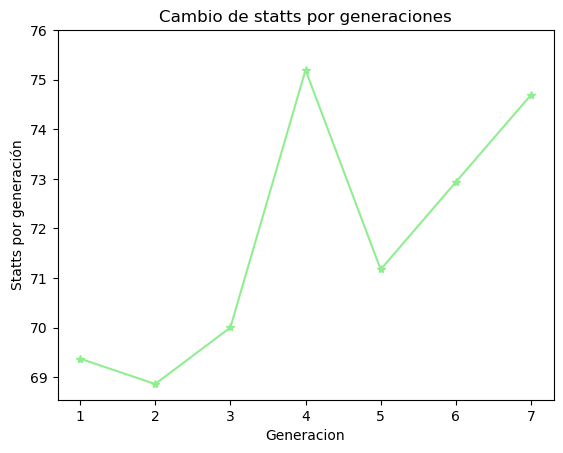

In [189]:
plt.plot(df_gen_Sttats.index, df_gen_Sttats["Statts"],marker = "*",color="#90EE90")
plt.title("Cambio de statts por generaciones")
plt.xlabel("Generacion")
plt.ylabel("Statts por generación")
plt.yticks([69,70,71,72,73,74,75,76])
plt.show()

In [166]:
df_gen_Sttats

,Statts
generation,
1,69.375276
2,68.863333
3,70.003704
4,75.196262
5,71.173077
6,72.935185
7,74.693750


**A lo largo de las generaciones se tiende a ver un crecimiento en el promedio de las estadisticas sin embargo es tan solo de 1 numero, sin embargo lo que fue el salto de la gen 3 a la 4 hubo un incremento de mayor al que se tiene acostumbrado, subiendo en 5 puntos**

### 8. ¿Un pokemon es más fuerte entre más dificil es de capturar?

In [167]:
df.at[773,"capture_rate"] = 30
df["capture_rate"] = df["capture_rate"].astype("float")

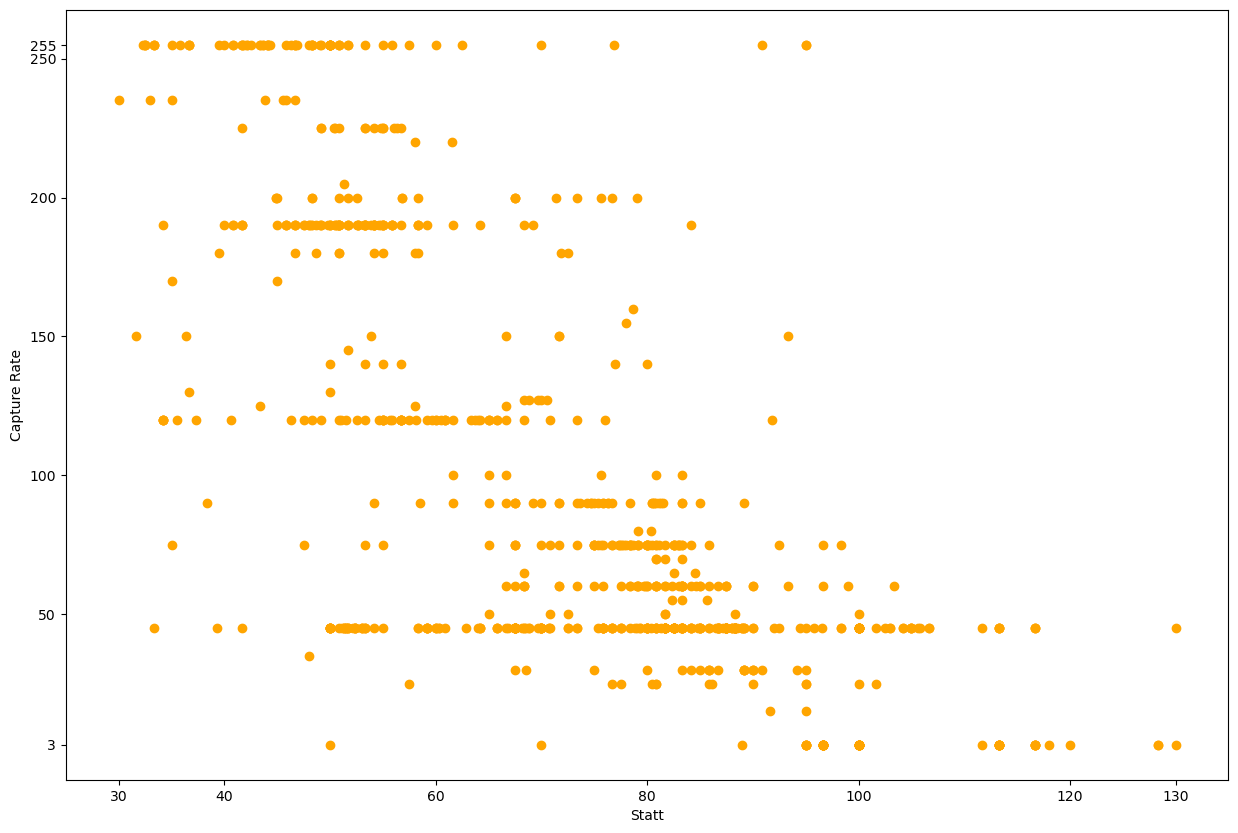

In [168]:
plt.figure(figsize=(15,10))
plt.scatter(df["Statts"], df["capture_rate"],color="#FFA500")
plt.xlabel("Statt")
plt.ylabel("Capture Rate")
plt.xticks([30,40,60,80,100,120,130])
plt.yticks([3,50,100,150,200,250,255])
plt.show()

In [190]:
df[["name","capture_rate","Statts"]]

,name,capture_rate,Statts
0,Bulbasaur,45,53.000000
1,Ivysaur,45,67.500000
2,Venusaur,45,104.166667
3,Charmander,45,51.500000
4,Charmeleon,45,67.500000
...,...,...,...
796,Celesteela,25,95.000000
797,Kartana,255,95.000000
798,Guzzlord,15,95.000000
799,Necrozma,3,100.000000


**Un pokemon es más dificil de capturar mientras más fuerte sea, esto se ve claramente ya que los puntos que se encuentran hasta la parte derecha quiere decir que son fuertes y que ademas si la marca esta situada en lo más bajo de la tabla querra decir que tiene menor posibilidad de atraparlo; entonces al hacer la relación y no encontrar puntos que esten tanto en el lado derecho y en la parte superior, se afirma que entre mayor sea su poder, menor posibilidad de atraparlo se tendra.**